In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import requests
import time
from sqlalchemy import inspect, create_engine
import matplotlib.pyplot as plt
import numpy as np


In [2]:
HOSTNAME = "localhost"
PORT = 5432
DATABASE = "diapers_db"
USERNAME = "postgres"
PASSWORD = "password"
path = f'postgresql+psycopg2://{USERNAME}:{PASSWORD}@{HOSTNAME}:{PORT}/{DATABASE}'
engine = create_engine(path)

In [3]:
conn = engine.connect()

In [4]:
ebay_url = 'https://www.ebay.com/sch/i.html?_dmd=1&_stpos=75088&_osacat=15559&_ftrt=901&_sop=13&_ftrv=1&_ipg=240&_odkw=diapers&_sadis=15&_from=R40&_trksid=p2045573.m570.l1313&_nkw=diapers&_sacat=15559'
amazon_url = 'https://www.amazon.com/s?k=diapers&rh=n%3A166772011&dc&crid=J525KHS74HCG&qid=1647560915&rnid=2941120011&sprefix=diapers%2Caps%2C290&ref=sr_nr_n_1'
walmart_url = 'https://www.walmart.com/browse/baby/diapers/5427_486190_1101406'
target_url = 'https://www.target.com/s?searchTerm=baby+diapers&sortBy=relevance&category=5xtly'


In [5]:
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been s

In [6]:
browser.visit(ebay_url)
time.sleep(2)

In [7]:
ebay_soup = BeautifulSoup(browser.html, 'html.parser')

In [8]:
ebay_items = ebay_soup.find_all("div", {"class": "s-item__wrapper"})
ebay_data = []

for ebay_item in ebay_items:
    ebay_title_elem = ebay_item.find("h3", {'class': 's-item__title'})
    ebay_title = ebay_title_elem.text
    
    ebay_price = ebay_item.find("span", {"class": "s-item__price"}).text
    
    ebay_info ={"title": ebay_title, "price": ebay_price}
    ebay_data.append(ebay_info)
    
ebay_df = pd.DataFrame(ebay_data)
ebay_df

,title,price
0,Shop on eBay,$20.00
1,Parent's Choice Disposable Diapers Baby Diaper...,$5.99 to $32.80
2,Pampers Baby Dry Disposable Diapers Size Newbo...,$12.99 to $72.99
3,Luvs Pro Level Leak Protection Diapers Size NB...,$9.99 to $60.99
4,Parent's Choice Disposable Baby Diapers Size N...,$7.44 to $30.45
...,...,...
238,"Baby Diapers, Size 3, 16-28 lbs, 144/Case",$32.95
239,Aimisin Bamboo Disposable Baby Diapers Biodegr...,$21.99 to $49.99
240,"Huggies Snug & Dry, Size 3, 76 Count",$24.00
241,Parent's Choice Disposable Baby Diapers Size N...,$7.44 to $30.45


In [9]:
ebay_df['price'].astype(str)

0                $20.00
1       $5.99 to $32.80
2      $12.99 to $72.99
3       $9.99 to $60.99
4       $7.44 to $30.45
             ...       
238              $32.95
239    $21.99 to $49.99
240              $24.00
241     $7.44 to $30.45
242    $39.99 to $52.99
Name: price, Length: 243, dtype: object

In [10]:
ebay_df['price_new'] =[float( x.split(' to ')[0].strip("$")) for x in ebay_df['price']] 
ebay_df.head(6)

,title,price,price_new
0,Shop on eBay,$20.00,20.00
1,Parent's Choice Disposable Diapers Baby Diaper...,$5.99 to $32.80,5.99
2,Pampers Baby Dry Disposable Diapers Size Newbo...,$12.99 to $72.99,12.99
3,Luvs Pro Level Leak Protection Diapers Size NB...,$9.99 to $60.99,9.99
4,Parent's Choice Disposable Baby Diapers Size N...,$7.44 to $30.45,7.44
5,"Huggies Little Snugglers Diapers, Size 2 - 186...",$29.99,29.99


In [11]:
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      243 non-null    object 
 1   price      243 non-null    object 
 2   price_new  243 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.8+ KB


In [12]:
ebay_df = ebay_df[['title','price_new']]
ebay_df

,title,price_new
0,Shop on eBay,20.00
1,Parent's Choice Disposable Diapers Baby Diaper...,5.99
2,Pampers Baby Dry Disposable Diapers Size Newbo...,12.99
3,Luvs Pro Level Leak Protection Diapers Size NB...,9.99
4,Parent's Choice Disposable Baby Diapers Size N...,7.44
...,...,...
238,"Baby Diapers, Size 3, 16-28 lbs, 144/Case",32.95
239,Aimisin Bamboo Disposable Baby Diapers Biodegr...,21.99
240,"Huggies Snug & Dry, Size 3, 76 Count",24.00
241,Parent's Choice Disposable Baby Diapers Size N...,7.44


In [13]:
ebay_df['reviews_clean']='0'
ebay_df

,title,price_new,reviews_clean
0,Shop on eBay,20.00,0
1,Parent's Choice Disposable Diapers Baby Diaper...,5.99,0
2,Pampers Baby Dry Disposable Diapers Size Newbo...,12.99,0
3,Luvs Pro Level Leak Protection Diapers Size NB...,9.99,0
4,Parent's Choice Disposable Baby Diapers Size N...,7.44,0
...,...,...,...
238,"Baby Diapers, Size 3, 16-28 lbs, 144/Case",32.95,0
239,Aimisin Bamboo Disposable Baby Diapers Biodegr...,21.99,0
240,"Huggies Snug & Dry, Size 3, 76 Count",24.00,0
241,Parent's Choice Disposable Baby Diapers Size N...,7.44,0


In [14]:
ebay_df['reviews_clean'] = ebay_df['reviews_clean'].astype(float, errors = 'raise')
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          243 non-null    object 
 1   price_new      243 non-null    float64
 2   reviews_clean  243 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.8+ KB


In [15]:
ebay_df['website'] = '2'
ebay_df

,title,price_new,reviews_clean,website
0,Shop on eBay,20.00,0.0,2
1,Parent's Choice Disposable Diapers Baby Diaper...,5.99,0.0,2
2,Pampers Baby Dry Disposable Diapers Size Newbo...,12.99,0.0,2
3,Luvs Pro Level Leak Protection Diapers Size NB...,9.99,0.0,2
4,Parent's Choice Disposable Baby Diapers Size N...,7.44,0.0,2
...,...,...,...,...
238,"Baby Diapers, Size 3, 16-28 lbs, 144/Case",32.95,0.0,2
239,Aimisin Bamboo Disposable Baby Diapers Biodegr...,21.99,0.0,2
240,"Huggies Snug & Dry, Size 3, 76 Count",24.00,0.0,2
241,Parent's Choice Disposable Baby Diapers Size N...,7.44,0.0,2


In [16]:
ebay_df.columns = ['title', 'price', 'reviews', 'website']
ebay_df

,title,price,reviews,website
0,Shop on eBay,20.00,0.0,2
1,Parent's Choice Disposable Diapers Baby Diaper...,5.99,0.0,2
2,Pampers Baby Dry Disposable Diapers Size Newbo...,12.99,0.0,2
3,Luvs Pro Level Leak Protection Diapers Size NB...,9.99,0.0,2
4,Parent's Choice Disposable Baby Diapers Size N...,7.44,0.0,2
...,...,...,...,...
238,"Baby Diapers, Size 3, 16-28 lbs, 144/Case",32.95,0.0,2
239,Aimisin Bamboo Disposable Baby Diapers Biodegr...,21.99,0.0,2
240,"Huggies Snug & Dry, Size 3, 76 Count",24.00,0.0,2
241,Parent's Choice Disposable Baby Diapers Size N...,7.44,0.0,2


In [17]:
# ebay_df = ebay_df.reindex(columns=['title', 'price', 'reviews', 'website'])
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    243 non-null    object 
 1   price    243 non-null    float64
 2   reviews  243 non-null    float64
 3   website  243 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.7+ KB


In [18]:
manufacturer = ["Huggies","Luvs","Pampers","Parent's Choice","Fisher-Price","Hello Bello"]
list1 = []
for index,row in ebay_df.iterrows():
    found = False
    for x in manufacturer: 
        if x in row.title:
            list1.append(x)
            found = True 
            break
    if not found:
        list1.append('')

In [19]:
ebay_df['manufacturer'] = list1
ebay_df

,title,price,reviews,website,manufacturer
0,Shop on eBay,20.00,0.0,2,
1,Parent's Choice Disposable Diapers Baby Diaper...,5.99,0.0,2,Parent's Choice
2,Pampers Baby Dry Disposable Diapers Size Newbo...,12.99,0.0,2,Pampers
3,Luvs Pro Level Leak Protection Diapers Size NB...,9.99,0.0,2,Luvs
4,Parent's Choice Disposable Baby Diapers Size N...,7.44,0.0,2,Parent's Choice
...,...,...,...,...,...
238,"Baby Diapers, Size 3, 16-28 lbs, 144/Case",32.95,0.0,2,
239,Aimisin Bamboo Disposable Baby Diapers Biodegr...,21.99,0.0,2,
240,"Huggies Snug & Dry, Size 3, 76 Count",24.00,0.0,2,Huggies
241,Parent's Choice Disposable Baby Diapers Size N...,7.44,0.0,2,Parent's Choice


In [20]:
ebay_df2 = ebay_df[ebay_df["manufacturer"] != ""]
ebay_df2

,title,price,reviews,website,manufacturer
1,Parent's Choice Disposable Diapers Baby Diaper...,5.99,0.0,2,Parent's Choice
2,Pampers Baby Dry Disposable Diapers Size Newbo...,12.99,0.0,2,Pampers
3,Luvs Pro Level Leak Protection Diapers Size NB...,9.99,0.0,2,Luvs
4,Parent's Choice Disposable Baby Diapers Size N...,7.44,0.0,2,Parent's Choice
5,"Huggies Little Snugglers Diapers, Size 2 - 186...",29.99,0.0,2,Huggies
...,...,...,...,...,...
234,"Huggies Plus Diapers Size 1: Up to 14lbs, 192c...",54.88,0.0,2,Huggies
235,Huggies Special Delivery Baby Diapers Size 6 (...,20.99,0.0,2,Huggies
236,"Pampers Swaddlers Sensetive Diapers, Newborn ...",14.99,0.0,2,Pampers
240,"Huggies Snug & Dry, Size 3, 76 Count",24.00,0.0,2,Huggies


In [21]:
ebay_df2['manufacturer_id'] = ebay_df2['manufacturer'].replace(to_replace='Huggies', value='1').replace(to_replace='Luvs', value='2').replace(to_replace='Pampers', value='3').replace(to_replace="Parent's Choice", value='4').replace(to_replace='Fisher-Price', value='5').replace(to_replace='Hello Bello', value='6')
ebay_df2

<ipython-input-21-7c646ea4c6a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ebay_df2['manufacturer_id'] = ebay_df2['manufacturer'].replace(to_replace='Huggies', value='1').replace(to_replace='Luvs', value='2').replace(to_replace='Pampers', value='3').replace(to_replace="Parent's Choice", value='4').replace(to_replace='Fisher-Price', value='5').replace(to_replace='Hello Bello', value='6')


,title,price,reviews,website,manufacturer,manufacturer_id
1,Parent's Choice Disposable Diapers Baby Diaper...,5.99,0.0,2,Parent's Choice,4
2,Pampers Baby Dry Disposable Diapers Size Newbo...,12.99,0.0,2,Pampers,3
3,Luvs Pro Level Leak Protection Diapers Size NB...,9.99,0.0,2,Luvs,2
4,Parent's Choice Disposable Baby Diapers Size N...,7.44,0.0,2,Parent's Choice,4
5,"Huggies Little Snugglers Diapers, Size 2 - 186...",29.99,0.0,2,Huggies,1
...,...,...,...,...,...,...
234,"Huggies Plus Diapers Size 1: Up to 14lbs, 192c...",54.88,0.0,2,Huggies,1
235,Huggies Special Delivery Baby Diapers Size 6 (...,20.99,0.0,2,Huggies,1
236,"Pampers Swaddlers Sensetive Diapers, Newborn ...",14.99,0.0,2,Pampers,3
240,"Huggies Snug & Dry, Size 3, 76 Count",24.00,0.0,2,Huggies,1


In [22]:
ebay_df2.columns = ['title', 'price', 'reviews', 'website_id', 'manufacturer', 'manufacturer_id']
ebay_df2

,title,price,reviews,website_id,manufacturer,manufacturer_id
1,Parent's Choice Disposable Diapers Baby Diaper...,5.99,0.0,2,Parent's Choice,4
2,Pampers Baby Dry Disposable Diapers Size Newbo...,12.99,0.0,2,Pampers,3
3,Luvs Pro Level Leak Protection Diapers Size NB...,9.99,0.0,2,Luvs,2
4,Parent's Choice Disposable Baby Diapers Size N...,7.44,0.0,2,Parent's Choice,4
5,"Huggies Little Snugglers Diapers, Size 2 - 186...",29.99,0.0,2,Huggies,1
...,...,...,...,...,...,...
234,"Huggies Plus Diapers Size 1: Up to 14lbs, 192c...",54.88,0.0,2,Huggies,1
235,Huggies Special Delivery Baby Diapers Size 6 (...,20.99,0.0,2,Huggies,1
236,"Pampers Swaddlers Sensetive Diapers, Newborn ...",14.99,0.0,2,Pampers,3
240,"Huggies Snug & Dry, Size 3, 76 Count",24.00,0.0,2,Huggies,1


In [23]:
ebay_df3 = ebay_df2[['title', 'price', 'reviews', 'website_id', 'manufacturer_id']]
ebay_df3

,title,price,reviews,website_id,manufacturer_id
1,Parent's Choice Disposable Diapers Baby Diaper...,5.99,0.0,2,4
2,Pampers Baby Dry Disposable Diapers Size Newbo...,12.99,0.0,2,3
3,Luvs Pro Level Leak Protection Diapers Size NB...,9.99,0.0,2,2
4,Parent's Choice Disposable Baby Diapers Size N...,7.44,0.0,2,4
5,"Huggies Little Snugglers Diapers, Size 2 - 186...",29.99,0.0,2,1
...,...,...,...,...,...
234,"Huggies Plus Diapers Size 1: Up to 14lbs, 192c...",54.88,0.0,2,1
235,Huggies Special Delivery Baby Diapers Size 6 (...,20.99,0.0,2,1
236,"Pampers Swaddlers Sensetive Diapers, Newborn ...",14.99,0.0,2,3
240,"Huggies Snug & Dry, Size 3, 76 Count",24.00,0.0,2,1


In [24]:
len(ebay_df3)

153

In [25]:
browser.visit(amazon_url)
time.sleep(2)

In [26]:
amazon_soup = BeautifulSoup(browser.html, 'html.parser')

In [27]:
amazon_items = amazon_soup.find_all("div", {"data-component-type":"s-search-result"})
len(amazon_items)

33

In [28]:
amazon_item = amazon_items[0]

In [29]:
# amazon_price = amazon_item.find("span", {"class":"a-price"}).find("span", {"class":"a-offscreen"}).text

In [30]:
# amazon_reviews = amazon_item.find("i").parent.parent.parent.parent.findChildren("span", recursive=False)[1].text.strip()

In [31]:
# amazon_title = amazon_item.find("h2").find("span").text

In [32]:
amazon_items = amazon_soup.find_all("div", {"data-component-type":"s-search-result"})
amazon_data = []

for amazon_item in amazon_items:
    amazon_title = amazon_item.find("h2").find("span").text
    try:
        amazon_price = amazon_item.find("span", {"class":"a-price"}).find("span", {"class":"a-offscreen"}).text
    except:
        pass
    amazon_reviews = amazon_item.find("i").parent.parent.parent.parent.findChildren("span", recursive=False)[1].text.strip()
    
    amazon_info ={"title": amazon_title, "price": amazon_price, "reviews":amazon_reviews}
    amazon_data.append(amazon_info)
    
amazon_df = pd.DataFrame(amazon_data)
amazon_df

,title,price,reviews
0,"Diapers Size 1 (8-14 lbs) Newborn, 198 Count -...",$51.90,"55,687"
1,"Diapers Size 6, 104 Count - Pampers Pull On Cr...",$53.44,"5,369"
2,"Huggies Baby Diapers, Little Movers, Multi-Col...",$51.96,"14,201"
3,"Amazon Brand - Mama Bear Gentle Touch Diapers,...",$31.76,"36,829"
4,"Diapers Newborn/Size 1 (8-14 lb), 120 Count - ...",$27.22,"21,104"
5,"Diapers Size 1 (8-14 lbs) Newborn, 198 Count -...",$51.90,"55,687"
6,"Diapers Size 2, 264 Count - Luvs Pro Level Lea...",$38.14,267
7,"Overnight Diapers Size 6 (35+ lbs), 42 Ct, Hug...",$26.97,"10,844"
8,"HUGGIES Snug & Dry Baby Diapers, Size 1, White...",$25.36,"5,427"
9,"Diapers Size 2, 234 Count - Pampers Baby Dry D...",$53.44,"37,022"


In [33]:
amazon_df["price_clean"] = [float(x.split("$")[-1]) if pd.notnull(x) else x for x in amazon_df.price ]
amazon_df.head(10)

,title,price,reviews,price_clean
0,"Diapers Size 1 (8-14 lbs) Newborn, 198 Count -...",$51.90,"55,687",51.90
1,"Diapers Size 6, 104 Count - Pampers Pull On Cr...",$53.44,"5,369",53.44
2,"Huggies Baby Diapers, Little Movers, Multi-Col...",$51.96,"14,201",51.96
3,"Amazon Brand - Mama Bear Gentle Touch Diapers,...",$31.76,"36,829",31.76
4,"Diapers Newborn/Size 1 (8-14 lb), 120 Count - ...",$27.22,"21,104",27.22
5,"Diapers Size 1 (8-14 lbs) Newborn, 198 Count -...",$51.90,"55,687",51.90
6,"Diapers Size 2, 264 Count - Luvs Pro Level Lea...",$38.14,267,38.14
7,"Overnight Diapers Size 6 (35+ lbs), 42 Ct, Hug...",$26.97,"10,844",26.97
8,"HUGGIES Snug & Dry Baby Diapers, Size 1, White...",$25.36,"5,427",25.36
9,"Diapers Size 2, 234 Count - Pampers Baby Dry D...",$53.44,"37,022",53.44


In [34]:
amazon_df['website']='1'
amazon_df

,title,price,reviews,price_clean,website
0,"Diapers Size 1 (8-14 lbs) Newborn, 198 Count -...",$51.90,"55,687",51.90,1
1,"Diapers Size 6, 104 Count - Pampers Pull On Cr...",$53.44,"5,369",53.44,1
2,"Huggies Baby Diapers, Little Movers, Multi-Col...",$51.96,"14,201",51.96,1
3,"Amazon Brand - Mama Bear Gentle Touch Diapers,...",$31.76,"36,829",31.76,1
4,"Diapers Newborn/Size 1 (8-14 lb), 120 Count - ...",$27.22,"21,104",27.22,1
5,"Diapers Size 1 (8-14 lbs) Newborn, 198 Count -...",$51.90,"55,687",51.90,1
6,"Diapers Size 2, 264 Count - Luvs Pro Level Lea...",$38.14,267,38.14,1
7,"Overnight Diapers Size 6 (35+ lbs), 42 Ct, Hug...",$26.97,"10,844",26.97,1
8,"HUGGIES Snug & Dry Baby Diapers, Size 1, White...",$25.36,"5,427",25.36,1
9,"Diapers Size 2, 234 Count - Pampers Baby Dry D...",$53.44,"37,022",53.44,1


In [35]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        33 non-null     object 
 1   price        33 non-null     object 
 2   reviews      33 non-null     object 
 3   price_clean  33 non-null     float64
 4   website      33 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.4+ KB


In [36]:
amazon_df = amazon_df[['title', 'reviews', 'price_clean', 'website']]
amazon_df

,title,reviews,price_clean,website
0,"Diapers Size 1 (8-14 lbs) Newborn, 198 Count -...","55,687",51.90,1
1,"Diapers Size 6, 104 Count - Pampers Pull On Cr...","5,369",53.44,1
2,"Huggies Baby Diapers, Little Movers, Multi-Col...","14,201",51.96,1
3,"Amazon Brand - Mama Bear Gentle Touch Diapers,...","36,829",31.76,1
4,"Diapers Newborn/Size 1 (8-14 lb), 120 Count - ...","21,104",27.22,1
5,"Diapers Size 1 (8-14 lbs) Newborn, 198 Count -...","55,687",51.90,1
6,"Diapers Size 2, 264 Count - Luvs Pro Level Lea...",267,38.14,1
7,"Overnight Diapers Size 6 (35+ lbs), 42 Ct, Hug...","10,844",26.97,1
8,"HUGGIES Snug & Dry Baby Diapers, Size 1, White...","5,427",25.36,1
9,"Diapers Size 2, 234 Count - Pampers Baby Dry D...","37,022",53.44,1


In [37]:
amazon_df.columns = ['title', 'reviews', 'price', 'website']
amazon_df

,title,reviews,price,website
0,"Diapers Size 1 (8-14 lbs) Newborn, 198 Count -...","55,687",51.90,1
1,"Diapers Size 6, 104 Count - Pampers Pull On Cr...","5,369",53.44,1
2,"Huggies Baby Diapers, Little Movers, Multi-Col...","14,201",51.96,1
3,"Amazon Brand - Mama Bear Gentle Touch Diapers,...","36,829",31.76,1
4,"Diapers Newborn/Size 1 (8-14 lb), 120 Count - ...","21,104",27.22,1
5,"Diapers Size 1 (8-14 lbs) Newborn, 198 Count -...","55,687",51.90,1
6,"Diapers Size 2, 264 Count - Luvs Pro Level Lea...",267,38.14,1
7,"Overnight Diapers Size 6 (35+ lbs), 42 Ct, Hug...","10,844",26.97,1
8,"HUGGIES Snug & Dry Baby Diapers, Size 1, White...","5,427",25.36,1
9,"Diapers Size 2, 234 Count - Pampers Baby Dry D...","37,022",53.44,1


In [38]:
amazon_df.replace(',','', regex=True, inplace=True)
amazon_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,title,reviews,price,website
0,Diapers Size 1 (8-14 lbs) Newborn 198 Count - ...,55687,51.90,1
1,Diapers Size 6 104 Count - Pampers Pull On Cru...,5369,53.44,1
2,Huggies Baby Diapers Little Movers Multi-Color...,14201,51.96,1
3,Amazon Brand - Mama Bear Gentle Touch Diapers ...,36829,31.76,1
4,Diapers Newborn/Size 1 (8-14 lb) 120 Count - P...,21104,27.22,1
5,Diapers Size 1 (8-14 lbs) Newborn 198 Count - ...,55687,51.90,1
6,Diapers Size 2 264 Count - Luvs Pro Level Leak...,267,38.14,1
7,Overnight Diapers Size 6 (35+ lbs) 42 Ct Huggi...,10844,26.97,1
8,HUGGIES Snug & Dry Baby Diapers Size 1 White 1...,5427,25.36,1
9,Diapers Size 2 234 Count - Pampers Baby Dry Di...,37022,53.44,1


In [39]:
amazon_df = amazon_df.reindex(columns=['title', 'price', 'reviews', 'website'])
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    33 non-null     object 
 1   price    33 non-null     float64
 2   reviews  33 non-null     object 
 3   website  33 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


In [40]:
amazon_df['reviews'] = amazon_df['reviews'].astype(float, errors = 'raise')
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    33 non-null     object 
 1   price    33 non-null     float64
 2   reviews  33 non-null     float64
 3   website  33 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.2+ KB


In [41]:
manufacturer = ["Huggies","Luvs","Pampers","Parent's Choice","Fisher-Price","Hello Bello"]
list3 = []
for index,row in amazon_df.iterrows():
    found = False
    for x in manufacturer: 
        if x in row.title:
            list3.append(x)
            found = True 
            break
    if not found:
        list3.append('')

In [42]:
print(list3)

['Pampers', 'Pampers', 'Huggies', '', 'Pampers', 'Pampers', 'Luvs', 'Huggies', '', 'Pampers', 'Huggies', 'Pampers', 'Huggies', 'Huggies', 'Pampers', 'Pampers', 'Huggies', 'Huggies', 'Luvs', '', 'Pampers', '', 'Pampers', '', 'Huggies', 'Pampers', 'Huggies', '', 'Huggies', '', 'Hello Bello', 'Pampers', 'Huggies']


In [43]:
amazon_df['manufacturer'] = list3
amazon_df

,title,price,reviews,website,manufacturer
0,Diapers Size 1 (8-14 lbs) Newborn 198 Count - ...,51.90,55687.0,1,Pampers
1,Diapers Size 6 104 Count - Pampers Pull On Cru...,53.44,5369.0,1,Pampers
2,Huggies Baby Diapers Little Movers Multi-Color...,51.96,14201.0,1,Huggies
3,Amazon Brand - Mama Bear Gentle Touch Diapers ...,31.76,36829.0,1,
4,Diapers Newborn/Size 1 (8-14 lb) 120 Count - P...,27.22,21104.0,1,Pampers
5,Diapers Size 1 (8-14 lbs) Newborn 198 Count - ...,51.90,55687.0,1,Pampers
6,Diapers Size 2 264 Count - Luvs Pro Level Leak...,38.14,267.0,1,Luvs
7,Overnight Diapers Size 6 (35+ lbs) 42 Ct Huggi...,26.97,10844.0,1,Huggies
8,HUGGIES Snug & Dry Baby Diapers Size 1 White 1...,25.36,5427.0,1,
9,Diapers Size 2 234 Count - Pampers Baby Dry Di...,53.44,37022.0,1,Pampers


In [44]:
amazon_df2 = amazon_df[amazon_df["manufacturer"] != ""]
amazon_df2

,title,price,reviews,website,manufacturer
0,Diapers Size 1 (8-14 lbs) Newborn 198 Count - ...,51.90,55687.0,1,Pampers
1,Diapers Size 6 104 Count - Pampers Pull On Cru...,53.44,5369.0,1,Pampers
2,Huggies Baby Diapers Little Movers Multi-Color...,51.96,14201.0,1,Huggies
4,Diapers Newborn/Size 1 (8-14 lb) 120 Count - P...,27.22,21104.0,1,Pampers
5,Diapers Size 1 (8-14 lbs) Newborn 198 Count - ...,51.90,55687.0,1,Pampers
6,Diapers Size 2 264 Count - Luvs Pro Level Leak...,38.14,267.0,1,Luvs
7,Overnight Diapers Size 6 (35+ lbs) 42 Ct Huggi...,26.97,10844.0,1,Huggies
9,Diapers Size 2 234 Count - Pampers Baby Dry Di...,53.44,37022.0,1,Pampers
10,Huggies Little Snugglers Baby Diapers Size New...,25.26,23191.0,1,Huggies
11,Diapers Size 3 168 Count - Pampers Pull On Cru...,53.44,5369.0,1,Pampers


In [45]:
amazon_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 32
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         26 non-null     object 
 1   price         26 non-null     float64
 2   reviews       26 non-null     float64
 3   website       26 non-null     object 
 4   manufacturer  26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [46]:
amazon_df2['manufacturer_id'] = amazon_df2['manufacturer'].replace(to_replace='Huggies', value='1').replace(to_replace='Luvs', value='2').replace(to_replace='Pampers', value='3').replace(to_replace="Parent's Choice", value='4').replace(to_replace='Fisher-Price', value='5').replace(to_replace='Hello Bello', value='6')
amazon_df2

<ipython-input-46-ebe3cebefd54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_df2['manufacturer_id'] = amazon_df2['manufacturer'].replace(to_replace='Huggies', value='1').replace(to_replace='Luvs', value='2').replace(to_replace='Pampers', value='3').replace(to_replace="Parent's Choice", value='4').replace(to_replace='Fisher-Price', value='5').replace(to_replace='Hello Bello', value='6')


,title,price,reviews,website,manufacturer,manufacturer_id
0,Diapers Size 1 (8-14 lbs) Newborn 198 Count - ...,51.90,55687.0,1,Pampers,3
1,Diapers Size 6 104 Count - Pampers Pull On Cru...,53.44,5369.0,1,Pampers,3
2,Huggies Baby Diapers Little Movers Multi-Color...,51.96,14201.0,1,Huggies,1
4,Diapers Newborn/Size 1 (8-14 lb) 120 Count - P...,27.22,21104.0,1,Pampers,3
5,Diapers Size 1 (8-14 lbs) Newborn 198 Count - ...,51.90,55687.0,1,Pampers,3
6,Diapers Size 2 264 Count - Luvs Pro Level Leak...,38.14,267.0,1,Luvs,2
7,Overnight Diapers Size 6 (35+ lbs) 42 Ct Huggi...,26.97,10844.0,1,Huggies,1
9,Diapers Size 2 234 Count - Pampers Baby Dry Di...,53.44,37022.0,1,Pampers,3
10,Huggies Little Snugglers Baby Diapers Size New...,25.26,23191.0,1,Huggies,1
11,Diapers Size 3 168 Count - Pampers Pull On Cru...,53.44,5369.0,1,Pampers,3


In [47]:
amazon_df2.columns = ['title', 'price', 'reviews', 'website_id', 'manufacturer', 'manufacturer_id']
amazon_df2

,title,price,reviews,website_id,manufacturer,manufacturer_id
0,Diapers Size 1 (8-14 lbs) Newborn 198 Count - ...,51.90,55687.0,1,Pampers,3
1,Diapers Size 6 104 Count - Pampers Pull On Cru...,53.44,5369.0,1,Pampers,3
2,Huggies Baby Diapers Little Movers Multi-Color...,51.96,14201.0,1,Huggies,1
4,Diapers Newborn/Size 1 (8-14 lb) 120 Count - P...,27.22,21104.0,1,Pampers,3
5,Diapers Size 1 (8-14 lbs) Newborn 198 Count - ...,51.90,55687.0,1,Pampers,3
6,Diapers Size 2 264 Count - Luvs Pro Level Leak...,38.14,267.0,1,Luvs,2
7,Overnight Diapers Size 6 (35+ lbs) 42 Ct Huggi...,26.97,10844.0,1,Huggies,1
9,Diapers Size 2 234 Count - Pampers Baby Dry Di...,53.44,37022.0,1,Pampers,3
10,Huggies Little Snugglers Baby Diapers Size New...,25.26,23191.0,1,Huggies,1
11,Diapers Size 3 168 Count - Pampers Pull On Cru...,53.44,5369.0,1,Pampers,3


In [48]:
amazon_df3 = amazon_df2[['title', 'price', 'reviews', 'website_id', 'manufacturer_id']]
amazon_df3

,title,price,reviews,website_id,manufacturer_id
0,Diapers Size 1 (8-14 lbs) Newborn 198 Count - ...,51.90,55687.0,1,3
1,Diapers Size 6 104 Count - Pampers Pull On Cru...,53.44,5369.0,1,3
2,Huggies Baby Diapers Little Movers Multi-Color...,51.96,14201.0,1,1
4,Diapers Newborn/Size 1 (8-14 lb) 120 Count - P...,27.22,21104.0,1,3
5,Diapers Size 1 (8-14 lbs) Newborn 198 Count - ...,51.90,55687.0,1,3
6,Diapers Size 2 264 Count - Luvs Pro Level Leak...,38.14,267.0,1,2
7,Overnight Diapers Size 6 (35+ lbs) 42 Ct Huggi...,26.97,10844.0,1,1
9,Diapers Size 2 234 Count - Pampers Baby Dry Di...,53.44,37022.0,1,3
10,Huggies Little Snugglers Baby Diapers Size New...,25.26,23191.0,1,1
11,Diapers Size 3 168 Count - Pampers Pull On Cru...,53.44,5369.0,1,3


In [49]:
len(amazon_df3)

26

In [50]:
browser.visit(walmart_url)
time.sleep(2)

In [51]:
walmart_soup = BeautifulSoup(browser.html, 'html.parser')

In [52]:
walmart_items = walmart_soup.find_all("div", {"class": "mb1 ph1 pa0-xl bb b--near-white w-25"})
walmart_item = walmart_items[1]
walmart_item

<div class="mb1 ph1 pa0-xl bb b--near-white w-25"><div class="h-100 pb1-xl pr4-xl pv1 ph1" style="content-visibility:auto;contain-intrinsic-size:198px 340px"><div class="sans-serif mid-gray relative flex flex-column w-100" data-item-id="6I67EK6A4XMP"><a class="absolute w-100 h-100 z-1" href="/ip/Pampers-Sensitive-Baby-Wipes-White-Cotton-Unscented-64-pack-9-Pack-carton/188635141?athbdg=L1700" link-identifier="188635141"><span class="w_AX">Pampers Sensitive Baby Wipes, White, Cotton, Unscented, 64/pack, 9 Pack/carton<!-- --> </span></a><div class="" data-testid="list-view"><div class=""><div class="h2 relative mb2"><span class="w_D4 w_EA w_ED absolute">Reduced price</span></div><div class="relative"><div class="relative overflow-hidden" style="max-width:290px;height:0;padding-bottom:min(290px, 100%);align-self:center;width:min(290px, 100%)"><img alt="" class="absolute top-0 left-0" data-testid="productTileImage" height="" loading="eager" src="https://i5.walmartimages.com/asr/01d1002b-209

In [53]:
walmart_title = walmart_item.find("span", {"class":"lh-title"}).text
walmart_title

'Pampers Sensitive Baby Wipes, White, Cotton, Unscented, 64/pack, 9 Pack/carton'

In [54]:
walmart_price = walmart_item.find("div", {"class":"lh-copy"}).text
walmart_price

'$29.55'

In [55]:
walmart_reviews = walmart_item.find("span", {"class":"f7"}).text
walmart_reviews

'1'

In [56]:
walmart_items = walmart_soup.find_all("div", {"class": "mb1 ph1 pa0-xl bb b--near-white w-25"})
walmart_data = []

for walmart_item in walmart_items:
    walmart_title = walmart_item.find("span", {"class":"lh-title"}).text    
    walmart_price = walmart_item.find("div", {"class":"lh-copy"}).text
    try:
        walmart_reviews = walmart_item.find("span", {"class":"f7"}).text
    except:
        pass
    
    walmart_info ={"title": walmart_title, "price": walmart_price, "reviews":walmart_reviews}
    walmart_data.append(walmart_info)
    
walmart_df = pd.DataFrame(walmart_data)
walmart_df

,title,price,reviews
0,Hello Bello Diapers - Dr. Seuss Edition (Choos...,$7.97,6
1,"Pampers Sensitive Baby Wipes, White, Cotton, U...",$29.55,1
2,Parent's Choice Diapers (Choose Your Size & Co...,From $4.12,4213
3,Pampers' Swaddlers Diapers Size 1 - 192 ct. ( ...,$59.96,4
4,Huggies Little Snugglers Diapers (Size 1 - 204...,$59.26,18486
5,Pampers Sensitive Baby Wipes (936 ct.),$34.98,18486
6,Huggies Natural Care Sensitive Baby Wipe Refil...,$33.89,7143
7,Parent's Choice Fragrance Free Baby Wipes (Cho...,From $1.48,8581
8,"Pampers Swaddlers Diapers, Soft and Absorbent,...",$60.50,890
9,"Luvs Ultra Leakguards Diapers, Size 4, 172 Counts",$52.46,4


In [57]:
# walmart_df['price_clean'] = walmart_df['price'].replace(to_replace='$ ', value='')
# walmart_df

In [58]:
walmart_df["price_clean"] = [float(x.split("$")[-1]) if pd.notnull(x) else x for x in walmart_df.price ]
walmart_df

,title,price,reviews,price_clean
0,Hello Bello Diapers - Dr. Seuss Edition (Choos...,$7.97,6,7.97
1,"Pampers Sensitive Baby Wipes, White, Cotton, U...",$29.55,1,29.55
2,Parent's Choice Diapers (Choose Your Size & Co...,From $4.12,4213,4.12
3,Pampers' Swaddlers Diapers Size 1 - 192 ct. ( ...,$59.96,4,59.96
4,Huggies Little Snugglers Diapers (Size 1 - 204...,$59.26,18486,59.26
5,Pampers Sensitive Baby Wipes (936 ct.),$34.98,18486,34.98
6,Huggies Natural Care Sensitive Baby Wipe Refil...,$33.89,7143,33.89
7,Parent's Choice Fragrance Free Baby Wipes (Cho...,From $1.48,8581,1.48
8,"Pampers Swaddlers Diapers, Soft and Absorbent,...",$60.50,890,60.50
9,"Luvs Ultra Leakguards Diapers, Size 4, 172 Counts",$52.46,4,52.46


In [59]:
walmart_df['reviews_clean'] = walmart_df['reviews'].replace(to_replace='18483', value='0').replace(to_replace='Sponsored', value='0')
walmart_df


,title,price,reviews,price_clean,reviews_clean
0,Hello Bello Diapers - Dr. Seuss Edition (Choos...,$7.97,6,7.97,6
1,"Pampers Sensitive Baby Wipes, White, Cotton, U...",$29.55,1,29.55,1
2,Parent's Choice Diapers (Choose Your Size & Co...,From $4.12,4213,4.12,4213
3,Pampers' Swaddlers Diapers Size 1 - 192 ct. ( ...,$59.96,4,59.96,4
4,Huggies Little Snugglers Diapers (Size 1 - 204...,$59.26,18486,59.26,18486
5,Pampers Sensitive Baby Wipes (936 ct.),$34.98,18486,34.98,18486
6,Huggies Natural Care Sensitive Baby Wipe Refil...,$33.89,7143,33.89,7143
7,Parent's Choice Fragrance Free Baby Wipes (Cho...,From $1.48,8581,1.48,8581
8,"Pampers Swaddlers Diapers, Soft and Absorbent,...",$60.50,890,60.50,890
9,"Luvs Ultra Leakguards Diapers, Size 4, 172 Counts",$52.46,4,52.46,4


In [60]:
walmart_df['reviews_cleannew'] = walmart_df['reviews_clean'].astype(float)
walmart_df

,title,price,reviews,price_clean,reviews_clean,reviews_cleannew
0,Hello Bello Diapers - Dr. Seuss Edition (Choos...,$7.97,6,7.97,6,6.0
1,"Pampers Sensitive Baby Wipes, White, Cotton, U...",$29.55,1,29.55,1,1.0
2,Parent's Choice Diapers (Choose Your Size & Co...,From $4.12,4213,4.12,4213,4213.0
3,Pampers' Swaddlers Diapers Size 1 - 192 ct. ( ...,$59.96,4,59.96,4,4.0
4,Huggies Little Snugglers Diapers (Size 1 - 204...,$59.26,18486,59.26,18486,18486.0
5,Pampers Sensitive Baby Wipes (936 ct.),$34.98,18486,34.98,18486,18486.0
6,Huggies Natural Care Sensitive Baby Wipe Refil...,$33.89,7143,33.89,7143,7143.0
7,Parent's Choice Fragrance Free Baby Wipes (Cho...,From $1.48,8581,1.48,8581,8581.0
8,"Pampers Swaddlers Diapers, Soft and Absorbent,...",$60.50,890,60.50,890,890.0
9,"Luvs Ultra Leakguards Diapers, Size 4, 172 Counts",$52.46,4,52.46,4,4.0


In [61]:
walmart_df['website']='3'
walmart_df

,title,price,reviews,price_clean,reviews_clean,reviews_cleannew,website
0,Hello Bello Diapers - Dr. Seuss Edition (Choos...,$7.97,6,7.97,6,6.0,3
1,"Pampers Sensitive Baby Wipes, White, Cotton, U...",$29.55,1,29.55,1,1.0,3
2,Parent's Choice Diapers (Choose Your Size & Co...,From $4.12,4213,4.12,4213,4213.0,3
3,Pampers' Swaddlers Diapers Size 1 - 192 ct. ( ...,$59.96,4,59.96,4,4.0,3
4,Huggies Little Snugglers Diapers (Size 1 - 204...,$59.26,18486,59.26,18486,18486.0,3
5,Pampers Sensitive Baby Wipes (936 ct.),$34.98,18486,34.98,18486,18486.0,3
6,Huggies Natural Care Sensitive Baby Wipe Refil...,$33.89,7143,33.89,7143,7143.0,3
7,Parent's Choice Fragrance Free Baby Wipes (Cho...,From $1.48,8581,1.48,8581,8581.0,3
8,"Pampers Swaddlers Diapers, Soft and Absorbent,...",$60.50,890,60.50,890,890.0,3
9,"Luvs Ultra Leakguards Diapers, Size 4, 172 Counts",$52.46,4,52.46,4,4.0,3


In [62]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             39 non-null     object 
 1   price             39 non-null     object 
 2   reviews           39 non-null     object 
 3   price_clean       39 non-null     float64
 4   reviews_clean     39 non-null     object 
 5   reviews_cleannew  39 non-null     float64
 6   website           39 non-null     object 
dtypes: float64(2), object(5)
memory usage: 2.3+ KB


In [63]:
walmart_df2 = walmart_df[['title','price_clean','reviews_cleannew','website']]
walmart_df2

,title,price_clean,reviews_cleannew,website
0,Hello Bello Diapers - Dr. Seuss Edition (Choos...,7.97,6.0,3
1,"Pampers Sensitive Baby Wipes, White, Cotton, U...",29.55,1.0,3
2,Parent's Choice Diapers (Choose Your Size & Co...,4.12,4213.0,3
3,Pampers' Swaddlers Diapers Size 1 - 192 ct. ( ...,59.96,4.0,3
4,Huggies Little Snugglers Diapers (Size 1 - 204...,59.26,18486.0,3
5,Pampers Sensitive Baby Wipes (936 ct.),34.98,18486.0,3
6,Huggies Natural Care Sensitive Baby Wipe Refil...,33.89,7143.0,3
7,Parent's Choice Fragrance Free Baby Wipes (Cho...,1.48,8581.0,3
8,"Pampers Swaddlers Diapers, Soft and Absorbent,...",60.50,890.0,3
9,"Luvs Ultra Leakguards Diapers, Size 4, 172 Counts",52.46,4.0,3


In [64]:
walmart_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             39 non-null     object 
 1   price_clean       39 non-null     float64
 2   reviews_cleannew  39 non-null     float64
 3   website           39 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.3+ KB


In [65]:
walmart_df2.columns = ['title', 'price', 'reviews', 'website']
walmart_df2

,title,price,reviews,website
0,Hello Bello Diapers - Dr. Seuss Edition (Choos...,7.97,6.0,3
1,"Pampers Sensitive Baby Wipes, White, Cotton, U...",29.55,1.0,3
2,Parent's Choice Diapers (Choose Your Size & Co...,4.12,4213.0,3
3,Pampers' Swaddlers Diapers Size 1 - 192 ct. ( ...,59.96,4.0,3
4,Huggies Little Snugglers Diapers (Size 1 - 204...,59.26,18486.0,3
5,Pampers Sensitive Baby Wipes (936 ct.),34.98,18486.0,3
6,Huggies Natural Care Sensitive Baby Wipe Refil...,33.89,7143.0,3
7,Parent's Choice Fragrance Free Baby Wipes (Cho...,1.48,8581.0,3
8,"Pampers Swaddlers Diapers, Soft and Absorbent,...",60.50,890.0,3
9,"Luvs Ultra Leakguards Diapers, Size 4, 172 Counts",52.46,4.0,3


In [66]:
walmart_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    39 non-null     object 
 1   price    39 non-null     float64
 2   reviews  39 non-null     float64
 3   website  39 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.3+ KB


In [67]:
manufacturer = ["Huggies","Luvs","Pampers","Parent's Choice","Fisher-Price","Hello Bello"]
list2 = []
for index,row in walmart_df2.iterrows():
    found = False
    for x in manufacturer: 
        if x in row.title:
            list2.append(x)
            found = True 
            break
    if not found:
        list2.append('')
            

In [68]:
list2

['Hello Bello',
 'Pampers',
 "Parent's Choice",
 'Pampers',
 'Huggies',
 'Pampers',
 'Huggies',
 "Parent's Choice",
 'Pampers',
 'Luvs',
 'Huggies',
 'Huggies',
 "Parent's Choice",
 'Pampers',
 '',
 'Pampers',
 'Luvs',
 '',
 '',
 'Fisher-Price',
 'Pampers',
 'Pampers',
 'Pampers',
 'Pampers',
 'Pampers',
 'Pampers',
 'Pampers',
 'Pampers',
 'Fisher-Price',
 'Fisher-Price',
 'Pampers',
 'Huggies',
 'Huggies',
 'Huggies',
 "Parent's Choice",
 "Parent's Choice",
 'Luvs',
 'Huggies',
 'Huggies']

In [69]:
walmart_df2['manufacturer'] = list2
walmart_df2

<ipython-input-69-8def15d2bc1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmart_df2['manufacturer'] = list2


,title,price,reviews,website,manufacturer
0,Hello Bello Diapers - Dr. Seuss Edition (Choos...,7.97,6.0,3,Hello Bello
1,"Pampers Sensitive Baby Wipes, White, Cotton, U...",29.55,1.0,3,Pampers
2,Parent's Choice Diapers (Choose Your Size & Co...,4.12,4213.0,3,Parent's Choice
3,Pampers' Swaddlers Diapers Size 1 - 192 ct. ( ...,59.96,4.0,3,Pampers
4,Huggies Little Snugglers Diapers (Size 1 - 204...,59.26,18486.0,3,Huggies
5,Pampers Sensitive Baby Wipes (936 ct.),34.98,18486.0,3,Pampers
6,Huggies Natural Care Sensitive Baby Wipe Refil...,33.89,7143.0,3,Huggies
7,Parent's Choice Fragrance Free Baby Wipes (Cho...,1.48,8581.0,3,Parent's Choice
8,"Pampers Swaddlers Diapers, Soft and Absorbent,...",60.50,890.0,3,Pampers
9,"Luvs Ultra Leakguards Diapers, Size 4, 172 Counts",52.46,4.0,3,Luvs


In [70]:
walmart_df3 = walmart_df2[walmart_df2["manufacturer"] != ""]
walmart_df3

,title,price,reviews,website,manufacturer
0,Hello Bello Diapers - Dr. Seuss Edition (Choos...,7.97,6.0,3,Hello Bello
1,"Pampers Sensitive Baby Wipes, White, Cotton, U...",29.55,1.0,3,Pampers
2,Parent's Choice Diapers (Choose Your Size & Co...,4.12,4213.0,3,Parent's Choice
3,Pampers' Swaddlers Diapers Size 1 - 192 ct. ( ...,59.96,4.0,3,Pampers
4,Huggies Little Snugglers Diapers (Size 1 - 204...,59.26,18486.0,3,Huggies
5,Pampers Sensitive Baby Wipes (936 ct.),34.98,18486.0,3,Pampers
6,Huggies Natural Care Sensitive Baby Wipe Refil...,33.89,7143.0,3,Huggies
7,Parent's Choice Fragrance Free Baby Wipes (Cho...,1.48,8581.0,3,Parent's Choice
8,"Pampers Swaddlers Diapers, Soft and Absorbent,...",60.50,890.0,3,Pampers
9,"Luvs Ultra Leakguards Diapers, Size 4, 172 Counts",52.46,4.0,3,Luvs


In [71]:
walmart_df3['manufacturer_id'] = walmart_df3['manufacturer'].replace(to_replace='Huggies', value='1').replace(to_replace='Luvs', value='2').replace(to_replace='Pampers', value='3').replace(to_replace="Parent's Choice", value='4').replace(to_replace='Fisher-Price', value='5').replace(to_replace='Hello Bello', value='6')
walmart_df3

<ipython-input-71-5a387e112c82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmart_df3['manufacturer_id'] = walmart_df3['manufacturer'].replace(to_replace='Huggies', value='1').replace(to_replace='Luvs', value='2').replace(to_replace='Pampers', value='3').replace(to_replace="Parent's Choice", value='4').replace(to_replace='Fisher-Price', value='5').replace(to_replace='Hello Bello', value='6')


,title,price,reviews,website,manufacturer,manufacturer_id
0,Hello Bello Diapers - Dr. Seuss Edition (Choos...,7.97,6.0,3,Hello Bello,6
1,"Pampers Sensitive Baby Wipes, White, Cotton, U...",29.55,1.0,3,Pampers,3
2,Parent's Choice Diapers (Choose Your Size & Co...,4.12,4213.0,3,Parent's Choice,4
3,Pampers' Swaddlers Diapers Size 1 - 192 ct. ( ...,59.96,4.0,3,Pampers,3
4,Huggies Little Snugglers Diapers (Size 1 - 204...,59.26,18486.0,3,Huggies,1
5,Pampers Sensitive Baby Wipes (936 ct.),34.98,18486.0,3,Pampers,3
6,Huggies Natural Care Sensitive Baby Wipe Refil...,33.89,7143.0,3,Huggies,1
7,Parent's Choice Fragrance Free Baby Wipes (Cho...,1.48,8581.0,3,Parent's Choice,4
8,"Pampers Swaddlers Diapers, Soft and Absorbent,...",60.50,890.0,3,Pampers,3
9,"Luvs Ultra Leakguards Diapers, Size 4, 172 Counts",52.46,4.0,3,Luvs,2


In [72]:
walmart_df3.columns = ['title', 'price', 'reviews', 'website_id', 'manufacturer', 'manufacturer_id']
walmart_df3

,title,price,reviews,website_id,manufacturer,manufacturer_id
0,Hello Bello Diapers - Dr. Seuss Edition (Choos...,7.97,6.0,3,Hello Bello,6
1,"Pampers Sensitive Baby Wipes, White, Cotton, U...",29.55,1.0,3,Pampers,3
2,Parent's Choice Diapers (Choose Your Size & Co...,4.12,4213.0,3,Parent's Choice,4
3,Pampers' Swaddlers Diapers Size 1 - 192 ct. ( ...,59.96,4.0,3,Pampers,3
4,Huggies Little Snugglers Diapers (Size 1 - 204...,59.26,18486.0,3,Huggies,1
5,Pampers Sensitive Baby Wipes (936 ct.),34.98,18486.0,3,Pampers,3
6,Huggies Natural Care Sensitive Baby Wipe Refil...,33.89,7143.0,3,Huggies,1
7,Parent's Choice Fragrance Free Baby Wipes (Cho...,1.48,8581.0,3,Parent's Choice,4
8,"Pampers Swaddlers Diapers, Soft and Absorbent,...",60.50,890.0,3,Pampers,3
9,"Luvs Ultra Leakguards Diapers, Size 4, 172 Counts",52.46,4.0,3,Luvs,2


In [73]:
erd = walmart_df3
erd

,title,price,reviews,website_id,manufacturer,manufacturer_id
0,Hello Bello Diapers - Dr. Seuss Edition (Choos...,7.97,6.0,3,Hello Bello,6
1,"Pampers Sensitive Baby Wipes, White, Cotton, U...",29.55,1.0,3,Pampers,3
2,Parent's Choice Diapers (Choose Your Size & Co...,4.12,4213.0,3,Parent's Choice,4
3,Pampers' Swaddlers Diapers Size 1 - 192 ct. ( ...,59.96,4.0,3,Pampers,3
4,Huggies Little Snugglers Diapers (Size 1 - 204...,59.26,18486.0,3,Huggies,1
5,Pampers Sensitive Baby Wipes (936 ct.),34.98,18486.0,3,Pampers,3
6,Huggies Natural Care Sensitive Baby Wipe Refil...,33.89,7143.0,3,Huggies,1
7,Parent's Choice Fragrance Free Baby Wipes (Cho...,1.48,8581.0,3,Parent's Choice,4
8,"Pampers Swaddlers Diapers, Soft and Absorbent,...",60.50,890.0,3,Pampers,3
9,"Luvs Ultra Leakguards Diapers, Size 4, 172 Counts",52.46,4.0,3,Luvs,2


In [74]:
brand = erd.groupby('manufacturer')
summary = brand.agg(['mean','median','var','std','sem'])["price"]
summary

,mean,median,var,std,sem
manufacturer,,,,,
Fisher-Price,45.000000,45.00,0.000000,0.000000,0.000000
Hello Bello,7.970000,7.97,NaN,NaN,NaN
Huggies,41.783333,52.51,448.041775,21.166997,7.055666
Luvs,52.613333,52.46,6.267633,2.503524,1.445410
Pampers,39.134000,38.31,365.300140,19.112827,4.934911
Parent's Choice,5.760000,4.22,19.535800,4.419932,1.976654


In [75]:
maxprice = erd.groupby('manufacturer').price.max()
maxprice


manufacturer
Fisher-Price       45.00
Hello Bello         7.97
Huggies            62.97
Luvs               55.19
Pampers            62.99
Parent's Choice    13.16
Name: price, dtype: float64

In [76]:
avg_price = erd.groupby("manufacturer").price.mean()
avg_price

manufacturer
Fisher-Price       45.000000
Hello Bello         7.970000
Huggies            41.783333
Luvs               52.613333
Pampers            39.134000
Parent's Choice     5.760000
Name: price, dtype: float64

In [77]:
avgprice = pd.DataFrame(data=avg_price).sort_values('price').reset_index()
avgprice

,manufacturer,price
0,Parent's Choice,5.760000
1,Hello Bello,7.970000
2,Pampers,39.134000
3,Huggies,41.783333
4,Fisher-Price,45.000000
5,Luvs,52.613333


In [78]:
maxReview = erd.groupby('manufacturer').reviews.max()
maxReview

manufacturer
Fisher-Price           0.0
Hello Bello            6.0
Huggies            18486.0
Luvs                4298.0
Pampers            18486.0
Parent's Choice     8581.0
Name: reviews, dtype: float64

In [79]:
max_price = pd.DataFrame(data=maxprice).sort_values('price').reset_index()
max_price

,manufacturer,price
0,Hello Bello,7.97
1,Parent's Choice,13.16
2,Fisher-Price,45.00
3,Luvs,55.19
4,Huggies,62.97
5,Pampers,62.99


In [80]:
max_review = pd.DataFrame(data=maxReview).sort_values('reviews').reset_index()
max_review

,manufacturer,reviews
0,Fisher-Price,0.0
1,Hello Bello,6.0
2,Luvs,4298.0
3,Parent's Choice,8581.0
4,Huggies,18486.0
5,Pampers,18486.0


In [81]:
max_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  6 non-null      object 
 1   price         6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 224.0+ bytes


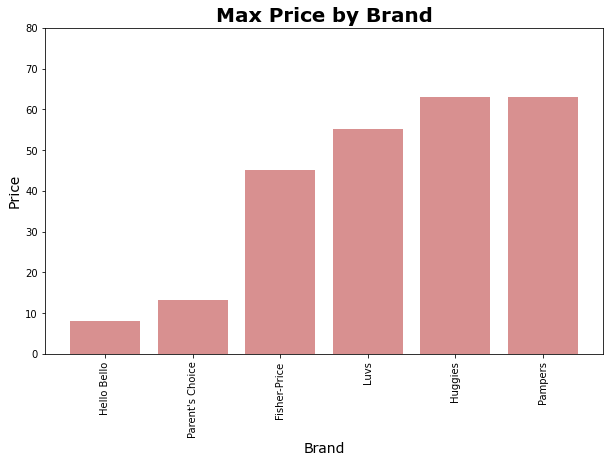

In [82]:
plt.figure(figsize=(10,6))
plt.bar(max_price.manufacturer,max_price.price,color='firebrick', alpha=0.5, align="center")


# Sets the y limits of the current chart
plt.ylim(0,80)
# Give our chart some labels and a tile
plt.title("Max Price by Brand",fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel("Brand",fontname = "Verdana", fontsize=14)
plt.ylabel("Price",fontname = "Verdana", fontsize=14)
plt.xticks(rotation=90)

plt.show()

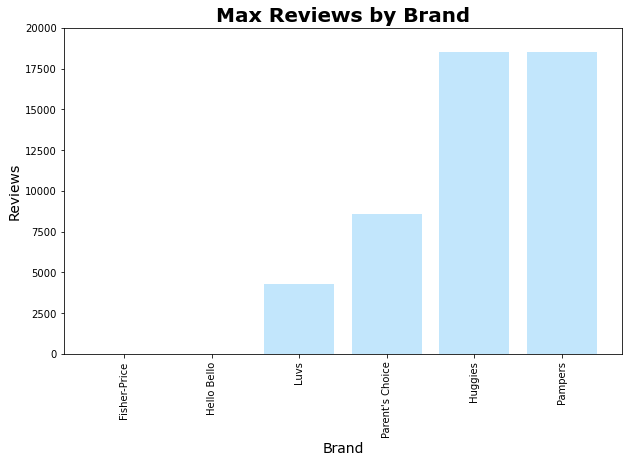

In [83]:
plt.figure(figsize=(10,6))
plt.bar(max_review.manufacturer,max_review.reviews,color='lightskyblue', alpha=0.5, align="center")


# Sets the y limits of the current chart
plt.ylim(0,20000)
# Give our chart some labels and a tile
plt.title("Max Reviews by Brand",fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel("Brand",fontname = "Verdana", fontsize=14)
plt.ylabel("Reviews",fontname = "Verdana", fontsize=14)
plt.xticks(rotation=90)

plt.show()

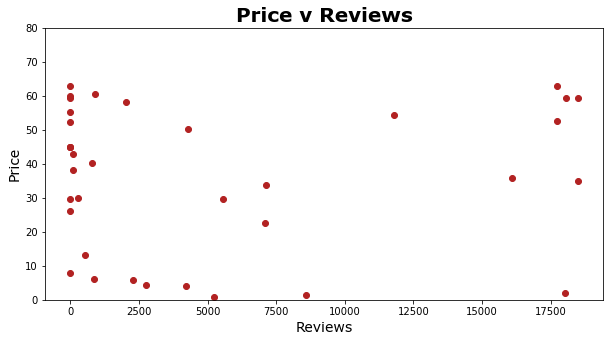

In [84]:
#Scatter Plot

plt.figure(figsize=(10,5))

plt.scatter(erd.reviews,erd.price, color="firebrick")

# The y limits of our scatter plot is 0 to 1
plt.ylim(0,80)

# The x limits of our scatter plot is 0 to 100
# plt.xlim(-0.5, 100)

# Give our chart some labels and a tile
plt.title("Price v Reviews",fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel("Reviews",fontname = "Verdana", fontsize=14)
plt.ylabel("Price",fontname = "Verdana", fontsize=14)

# Prints the scatter plot to the screen
plt.show()

In [85]:
price_list = list(max_price.price)
price_list

[7.97, 13.16, 45.0, 55.19, 62.97, 62.99]

In [86]:
manufacturer_list = list(max_price.manufacturer)
manufacturer_list

['Hello Bello',
 "Parent's Choice",
 'Fisher-Price',
 'Luvs',
 'Huggies',
 'Pampers']

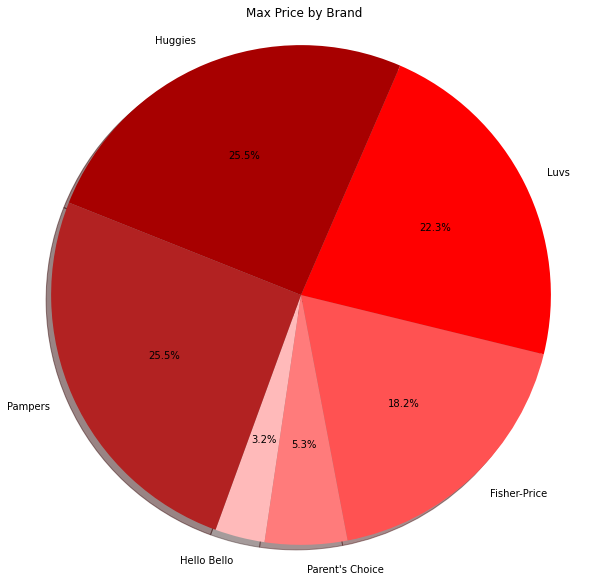

In [87]:
plt.figure(figsize=(10,10))
colors = ["#ffbaba","#ff7b7b","#ff5252","#ff0000","#a70000","firebrick"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(price_list, labels=manufacturer_list, colors=colors,
        autopct="%1.1f%%",shadow=True, startangle=250)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.title("Max Price by Brand")

plt.show()

In [88]:
walmart_df4 = walmart_df3[['title', 'price', 'reviews', 'website_id', 'manufacturer_id']]
walmart_df4

,title,price,reviews,website_id,manufacturer_id
0,Hello Bello Diapers - Dr. Seuss Edition (Choos...,7.97,6.0,3,6
1,"Pampers Sensitive Baby Wipes, White, Cotton, U...",29.55,1.0,3,3
2,Parent's Choice Diapers (Choose Your Size & Co...,4.12,4213.0,3,4
3,Pampers' Swaddlers Diapers Size 1 - 192 ct. ( ...,59.96,4.0,3,3
4,Huggies Little Snugglers Diapers (Size 1 - 204...,59.26,18486.0,3,1
5,Pampers Sensitive Baby Wipes (936 ct.),34.98,18486.0,3,3
6,Huggies Natural Care Sensitive Baby Wipe Refil...,33.89,7143.0,3,1
7,Parent's Choice Fragrance Free Baby Wipes (Cho...,1.48,8581.0,3,4
8,"Pampers Swaddlers Diapers, Soft and Absorbent,...",60.50,890.0,3,3
9,"Luvs Ultra Leakguards Diapers, Size 4, 172 Counts",52.46,4.0,3,2


In [89]:
len(walmart_df4)

36

In [90]:
manufacturer = pd.DataFrame()
manufacturer["manufacturer"] = ["Huggies", "Luvs", "Pampers", "Parent's Choice", "Fisher-Price", "Hello Bello"]
manufacturer
manufacturer2 = pd.read_sql("select manufacturer_id, manufacturer from manufacturer", con=conn)
manufacturer2

,manufacturer_id,manufacturer
0,1,Huggies
1,2,Luvs
2,3,Pampers
3,4,Parent's Choice
4,5,Fisher-Price
5,6,Hello Bello


In [96]:
website = pd.DataFrame()
website["website"] = ["Amazon", "eBay", "Wal-Mart"]
website.head()
# # website2 = pd.read_sql("select website_id, website from website", con=conn)
# website2

,website
0,Amazon
1,eBay
2,Wal-Mart


In [92]:
#merging ebay, amazon, & walmart dataframes

In [93]:
# ebay_df3
# amazon_df3
# walmart_df4
# how do merge


In [94]:
df_list = [ebay_df3, amazon_df3, walmart_df4]
all_df = pd.concat(df_list, sort=False)

In [95]:
all_df

,title,price,reviews,website_id,manufacturer_id
1,Parent's Choice Disposable Diapers Baby Diaper...,5.99,0.0,2,4
2,Pampers Baby Dry Disposable Diapers Size Newbo...,12.99,0.0,2,3
3,Luvs Pro Level Leak Protection Diapers Size NB...,9.99,0.0,2,2
4,Parent's Choice Disposable Baby Diapers Size N...,7.44,0.0,2,4
5,"Huggies Little Snugglers Diapers, Size 2 - 186...",29.99,0.0,2,1
...,...,...,...,...,...
34,Parent's Choice Boys Training Pants (Choose Yo...,5.82,2269.0,3,4
35,Parent's Choice Sensitive with Soothing Aloe B...,4.22,2753.0,3,4
36,Luvs Pro Level Leak Protection Diapers Size 1 ...,50.19,4298.0,3,2
37,Huggies Little Snugglers Diapers Size 1 -204 c...,62.97,17734.0,3,1


In [ ]:
# all_df2 = all_df

In [ ]:
# all_df2 = pd.read_sql("select * from diapers", con=conn)
# all_df2

In [ ]:
# all_df2.to_sql("diapers", connection, allrows, append or replace, not write index)

In [ ]:
# all_df2.to_sql(‘diapers’, con=conn, if_exists=’replace’, index=False)

In [ ]:
# all_df2.to_sql("diapers", con=conn, method="multi", if_exists="append", index=False)